# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [4]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
filter(sports == 'Basketball') |>
pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
select(year, institution_name, men_or_women, expenditure_usd) |>
mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

In [6]:
head(ncaa_sports_spending)

year,institution_name,men_or_women,expenditure_usd
<dbl>,<chr>,<chr>,<dbl>
2015,Alabama A & M University,men,817868
2015,Alabama A & M University,women,742460
2015,University of Alabama at Birmingham,men,4189826
2015,University of Alabama at Birmingham,women,1962579
2015,University of Alabama in Huntsville,men,612569
2015,University of Alabama in Huntsville,women,386007


**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** add the argument `weight = expenditure_usd` when you use `geom_bar` so the bar height reflects spending.)

Warning message:
“Removed 609 rows containing missing values (position_stack).”


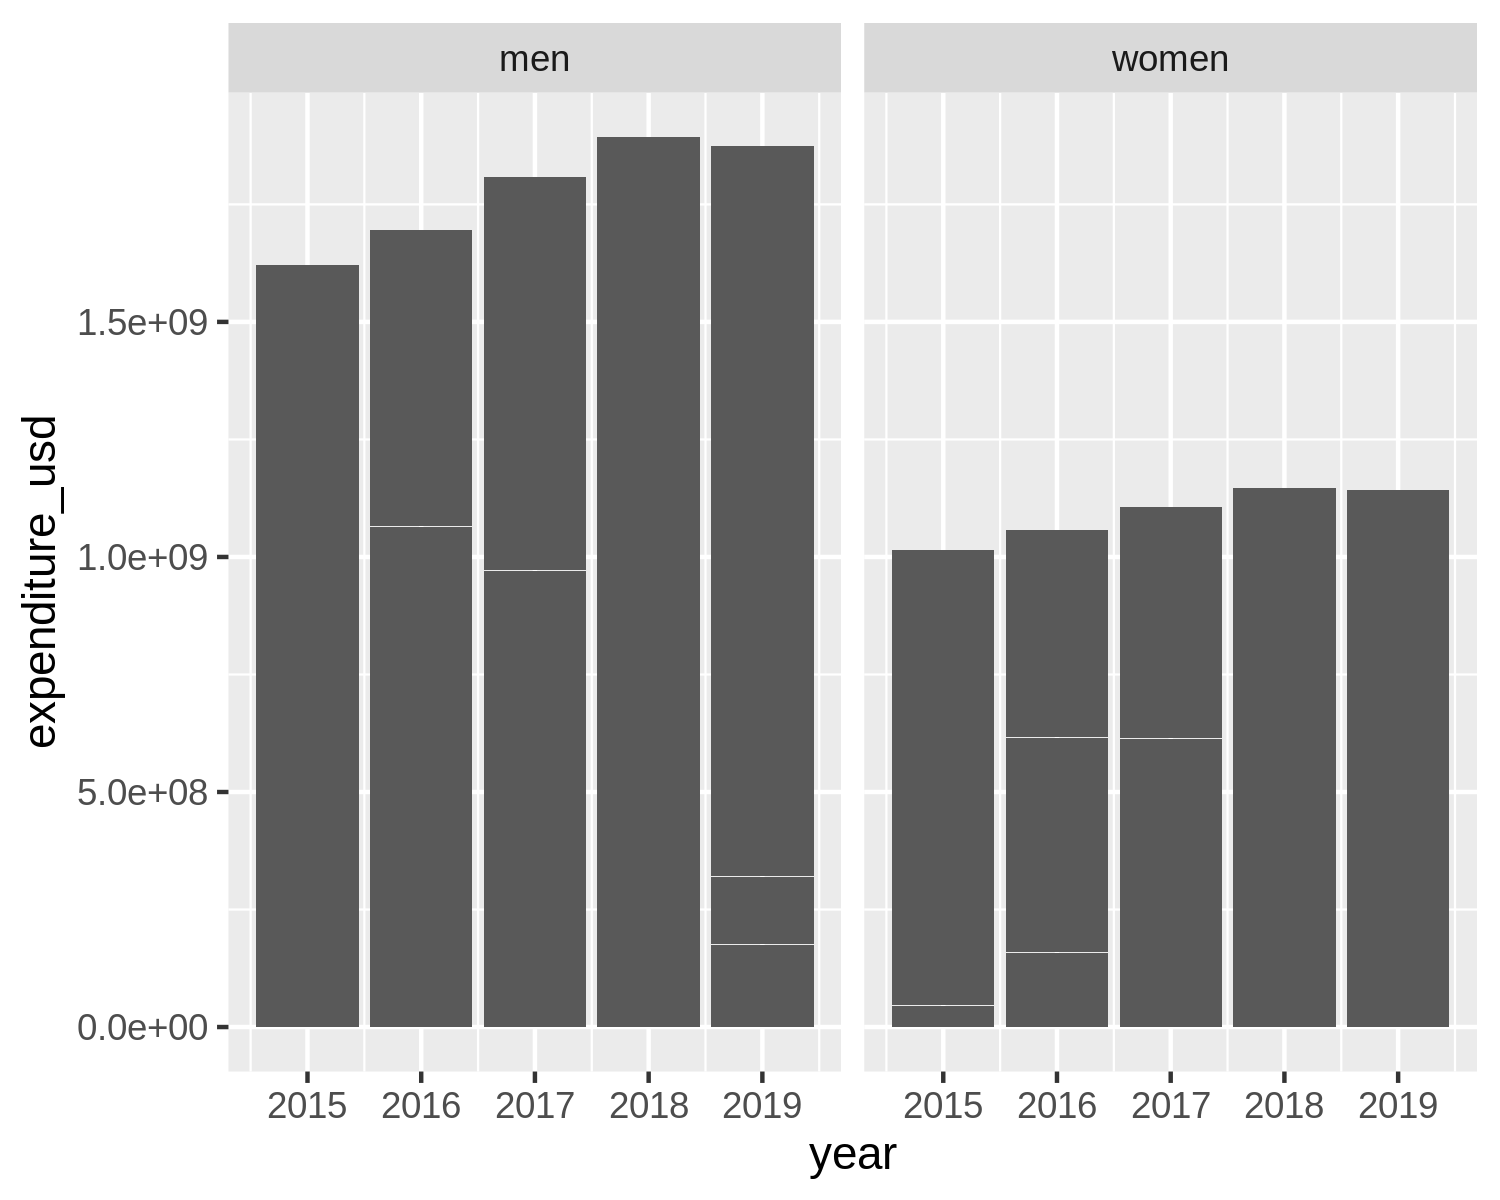

In [34]:
p = ggplot(ncaa_sports_spending, aes(x=year, y = expenditure_usd))

p = p + geom_col()

p = p + facet_wrap(~men_or_women)

p 

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [35]:
unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
mutate(sports = fct_reorder(sports, exp_women)) |>
pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
select(year, institution_name, sports, men_or_women, expenditure_usd) |>
mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
filter(!is.na(expenditure_usd))

In [36]:
head(unc_sports_spending_2019)

year,institution_name,sports,men_or_women,expenditure_usd
<dbl>,<chr>,<fct>,<chr>,<dbl>
2019,University of North Carolina at Chapel Hill,Baseball,men,3056674
2019,University of North Carolina at Chapel Hill,Basketball,men,9156512
2019,University of North Carolina at Chapel Hill,Basketball,women,3867351
2019,University of North Carolina at Chapel Hill,All Track Combined,men,1341780
2019,University of North Carolina at Chapel Hill,All Track Combined,women,1808446
2019,University of North Carolina at Chapel Hill,Fencing,men,213847


Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

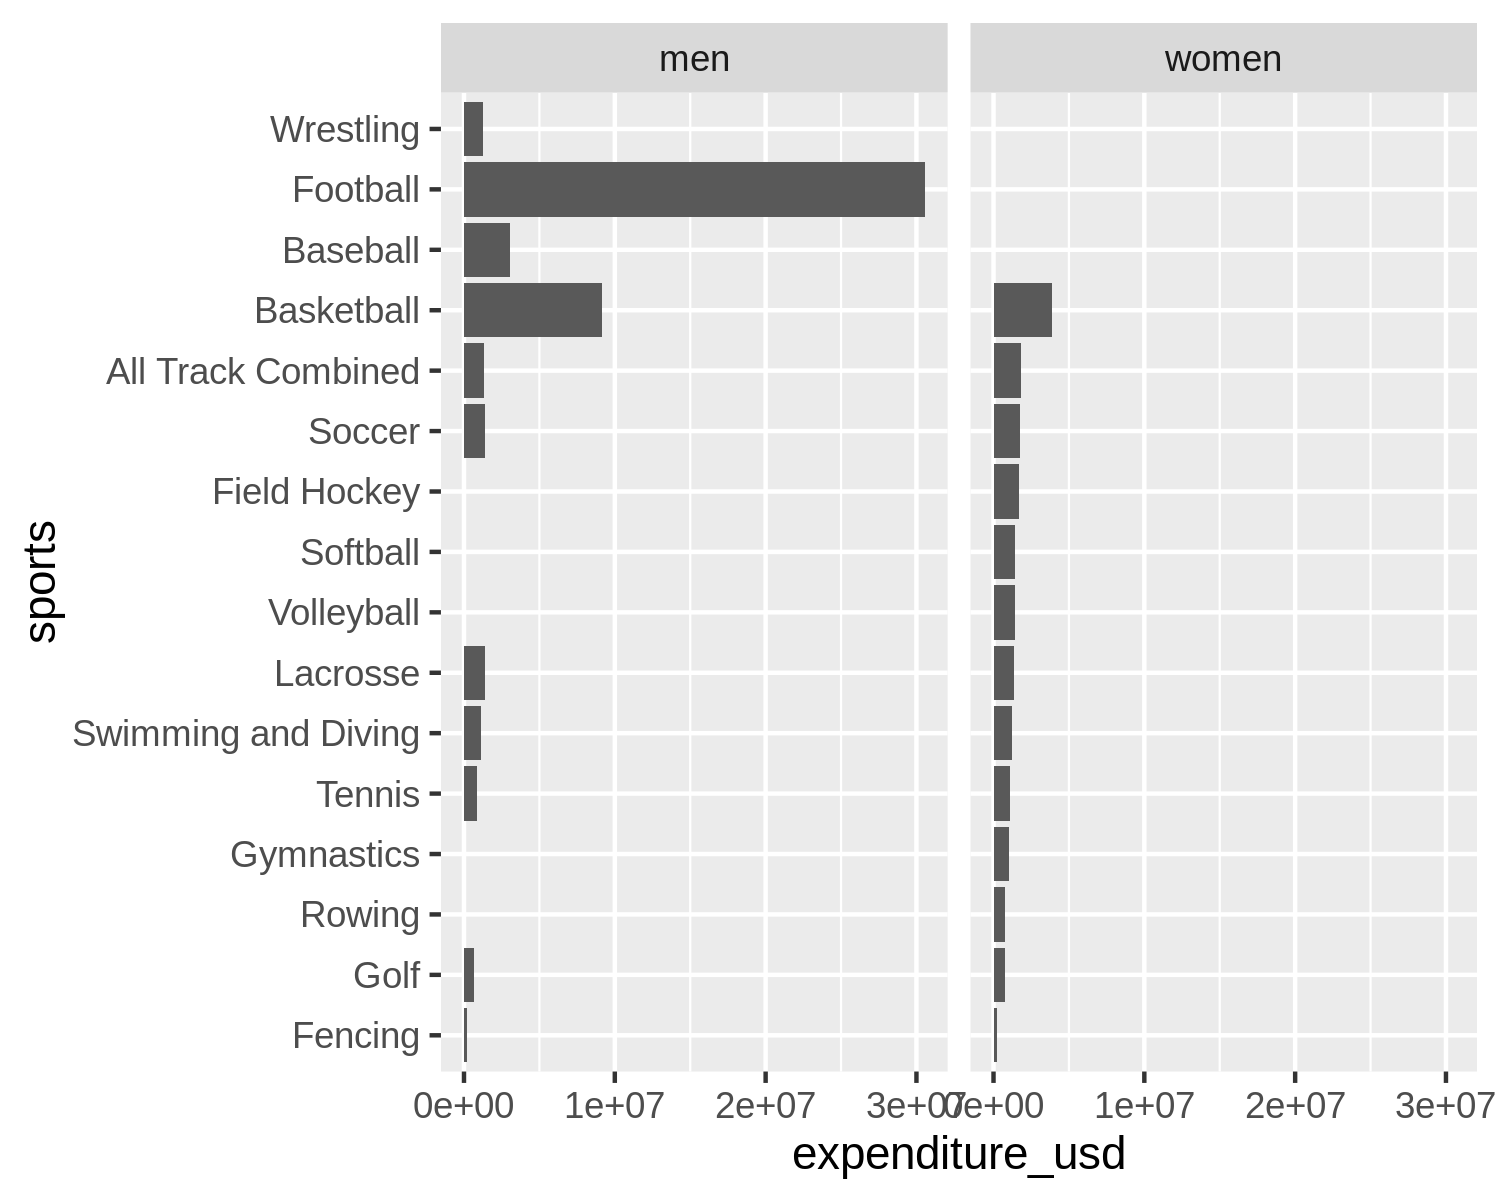

In [39]:
# bar chart code goes here

p = ggplot(unc_sports_spending_2019, aes(x = expenditure_usd, y = sports))

p = p + geom_col()

p = p + facet_wrap(~men_or_women)

p




You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/unc_sports_spending.png). **Your chart does not need to look like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?